In [8]:
# Análise de imagem para teste Tarken - Davi Janisch Maia
import cv2
from IPython.display import Image
import pandas as pd
import numpy as np

In [9]:
# Importando a imagem com cv2. Pelo que li na documentação da biblioteca, ela converte
# incialmente a imagem em um array com os pixels dentro em forma HSV de cores;

imagem = cv2.imread('meteor_challenge_01.png')

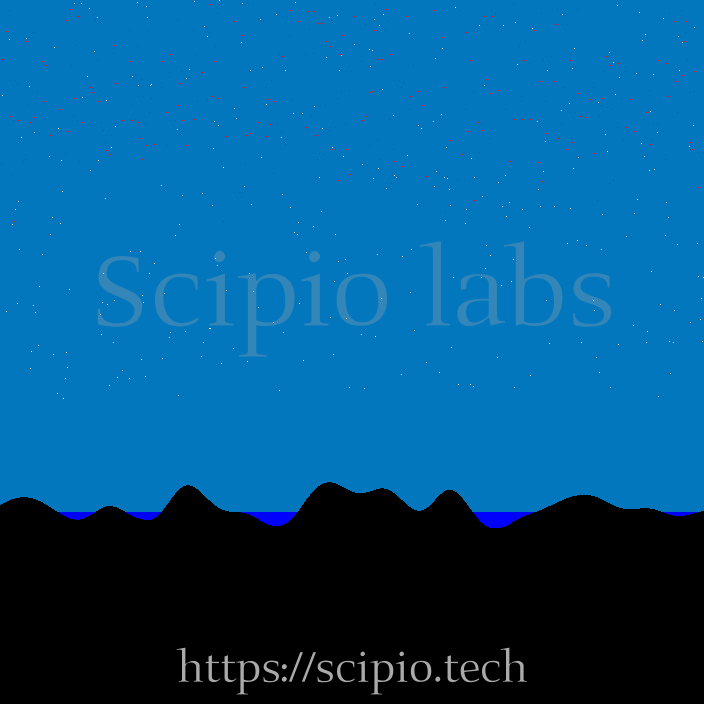

In [10]:
# Visualizando a imagem com IPython

Image("meteor_challenge_01.png")

In [11]:
# Salvando altura e largura da imagem em pixels
altura, largura, chanels = imagem.shape
print(f'Altura: {altura}\nLargura: {largura}')

Altura: 704
Largura: 704


In [12]:
# O cv2 interpreta a imagem com os pixels em um array 2d 704 x 704. A primeira
# dimensão são as linhas e a segunda as colunas. Primeiro vou converter os pixels
# para RGB e assim facilitar a manipulação.

rgb_image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

In [13]:
np.unique(rgb_image[677], axis=0)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   2,   2],
       [  3,   3,   3],
       [  6,   6,   6],
       [  8,   8,   8],
       [ 12,  12,  12],
       [ 28,  28,  28],
       [ 29,  29,  29],
       [ 32,  32,  32],
       [ 53,  53,  53],
       [ 55,  55,  55],
       [ 65,  65,  65],
       [ 72,  72,  72],
       [ 74,  74,  74],
       [ 80,  80,  80],
       [ 81,  81,  81],
       [ 87,  87,  87],
       [ 95,  95,  95],
       [100, 100, 100],
       [112, 112, 112],
       [119, 119, 119],
       [122, 122, 122],
       [132, 132, 132],
       [133, 133, 133],
       [134, 134, 134],
       [135, 135, 135],
       [139, 139, 139],
       [147, 147, 147],
       [154, 154, 154],
       [155, 155, 155],
       [157, 157, 157],
       [162, 162, 162],
       [165, 165, 165],
       [166, 166, 166],
       [167, 167, 167],
       [170, 170, 170]], dtype=uint8)

In [14]:
# Agora que convertemos de HSV para RGB, as cores dos pixels, salvamos cada cor que existe
# dentro da imagem. Além disso, iremos armazenar cada cor e suas ocorrências

unique, counts = np.unique(rgb_image.reshape(-1, 3), axis=0, return_counts=True)

# Combinação dos valores únicos (pixels) e suas contagens
pixel_counts = dict(zip(map(tuple, unique), counts))

# Exibir a contagem de ocorrência de cada pixel
for pixel, count in pixel_counts.items():
    print(f"Pixel {pixel}: {count} ocorrências")

Pixel (0, 0, 0): 135875 ocorrências
Pixel (0, 0, 255): 1535 ocorrências
Pixel (1, 1, 1): 116 ocorrências
Pixel (2, 2, 2): 11 ocorrências
Pixel (2, 119, 188): 29 ocorrências
Pixel (2, 119, 189): 343695 ocorrências
Pixel (3, 3, 3): 39 ocorrências
Pixel (3, 119, 189): 42 ocorrências
Pixel (3, 120, 189): 100 ocorrências
Pixel (4, 4, 4): 14 ocorrências
Pixel (4, 119, 188): 19 ocorrências
Pixel (4, 120, 189): 35 ocorrências
Pixel (4, 120, 190): 15 ocorrências
Pixel (5, 5, 5): 26 ocorrências
Pixel (5, 120, 188): 25 ocorrências
Pixel (5, 120, 189): 113 ocorrências
Pixel (6, 6, 6): 17 ocorrências
Pixel (6, 120, 188): 8 ocorrências
Pixel (6, 120, 189): 40 ocorrências
Pixel (6, 121, 189): 20 ocorrências
Pixel (7, 7, 7): 18 ocorrências
Pixel (7, 120, 188): 103 ocorrências
Pixel (7, 121, 189): 28 ocorrências
Pixel (8, 8, 8): 20 ocorrências
Pixel (8, 120, 188): 14 ocorrências
Pixel (8, 121, 188): 29 ocorrências
Pixel (9, 9, 9): 14 ocorrências
Pixel (9, 121, 188): 94 ocorrências
Pixel (9, 121, 189): 

In [15]:
# Sabendo que o RGB da cor branca é (255, 255, 255) e da cor vermelha é
# (255, 0, 0), basta chamar essas chaves.

# RESPOSTA 1 E 2 !!!!!!

print(f"Números de meteoros: {pixel_counts[(255, 0, 0)]}\nNúmero de estrelas: {pixel_counts[(255, 255, 255)]}")

Números de meteoros: 328
Número de estrelas: 315


In [20]:
# Agora, sabendo que a água está sendo identificada pelo pixel (0, 0, 255), que simboliza
# o azul puro em RGB, vamos identificar os pontos únicos do eixo x da água e os pontos x
# dos pontos vermelhos. Assim, podemos conferir quantos meteoros estão no mesmo ponto x (únicos)
# da água, podendo calcular a quantidade de meteoros que irão cair na água. 

''' A função abaixo receberá um rgb e devolverá todos os pontos x, de plano cartesiano, que há
o pixel com determinado rgb. Isso será utilizado para coletar os pontos das cores vermelhas(meteoros)
e azul(mar).'''


def contaPontoX(rgb):
  pontos = []

  for y in range(altura):
    for x in range(largura):
      if rgb_image[y][x].tolist() == rgb:
        pontos.append(x)

  return pontos

'''
Aqui eu utilizei todos os pontos X de Pixels vermelhos e os azuis, porém sem repetição, pois
algo não irá cair no primeiro pixel e no de baixo. Assim, utilizo um for para calcular quantos
pontos X são iguais aos existentes de azuis e, podemos, determinar quais estão caindo perpendicular
ao mar. 
'''
pontosAzuisUnicos = np.unique(np.array(contaPontoX([0, 0, 255])), axis = 0)
pontosVermelhos = contaPontoX([255, 0, 0])

meteorosPerpe = 0

for x in pontosVermelhos:
  if x in pontosAzuisUnicos:
    meteorosPerpe += 1

# RESPOSTA 3 !!!!
print(f'Meteoros que estão caindo perpendicularmente ao mar: {meteorosPerpe}')

Meteoros que estão caindo perpendicularmente ao mar: 105
